# Project Title (Bank Marketing)

* Write out the problem statement
    * Predict if the customer will subscribe a term deposit
* Give a short description of the project
   * The data is related with direct marketing campaigns of a Portuguese banking institution. 
     The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
     in order to access if the product (bank term deposit) would be (or not) subscribed. 

In [1]:
#import python libraries for data manipulation and visualization
import pandas as pd

#import other libraries....
import matplotlib.pyplot as plt
import seaborn as sns

# Data Inspection

* Load the data set
* Within a markdown cell, give a description of the dataset:
    * what is the source of the data?
    * how many rows and columns?
    * does it have missing values?
    * any other significant details

In [2]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters
data = pd.read_csv('bank2.csv',sep=';', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [3]:
#set values in the first row as columns to the data frame
data.rename(columns = data.iloc[0],inplace=True)
data.head(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [4]:
#delete the first row 
data.drop(0,inplace=True)
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


**Inspect The Data**

In [5]:
#first 5 rows
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
#last 5 rows
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4521,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [7]:
#data shape
data.shape

(4521, 17)

In [8]:
#data columns
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
#data details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [10]:
#check missing value
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* Handling missing values (NaN)
* Replacing text
* Removing or deleting unnecessary records

In [11]:
#change data type
data = data.astype({"age":"int64", 'balance': 'int64', 'duration': 'int64', "day":"int64", "previous":"int64", "pdays":"int64", "campaign":"int64"})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [13]:
#replace no with 0
#replace yes with 1
data.replace({"no":0, "yes":1}, inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
2,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
3,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
4,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
5,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


<AxesSubplot:>

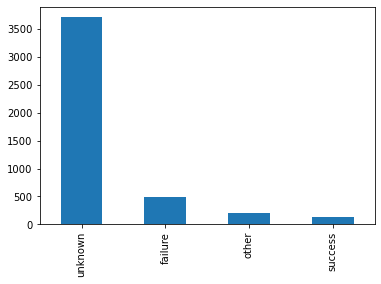

In [14]:
#check unnecessary records
data["poutcome"].value_counts().plot.bar()

In [15]:
#delete poutcome column
data.drop("poutcome", axis=1, inplace=True)

<AxesSubplot:>

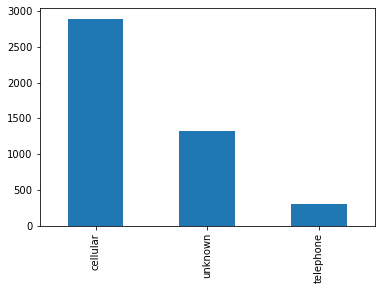

In [16]:
#check unnecessary records
data.contact.value_counts().plot.bar()

In [17]:
#delete contact column
data.drop("contact",  axis=1, inplace=True)

In [18]:
data["job"].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [19]:
#remove string unknown
df = data[data["job"].str.contains("unknown")==False]


In [20]:
data["education"].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [21]:
#remove string unknown
Data = df[df["education"].str.contains("unknown")==False]

In [22]:
Data["education"].value_counts()

secondary    2298
tertiary     1342
primary       671
Name: education, dtype: int64

# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis

Create charts where you plot only one variable (column) at a time. 

You can use simple charts like histograms and boxplots.

> For example, use a histogram to plot an age distribution column (if you have one).

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

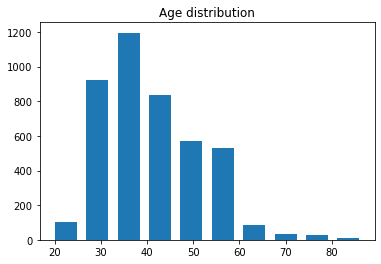

In [72]:
plt.hist(Data.age, rwidth=0.7)
plt.title("Age distribution")
plt.show()

<AxesSubplot:>

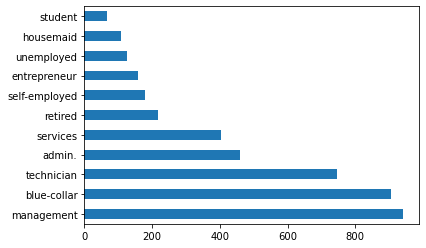

In [30]:
#univariate analysis cells
Data["job"].value_counts().plot.barh()

## Bivariate Analysis

Create charts where you plot only two variables at a time on a chart. 

You can use visuals like bar charts, boxplots, scatter plots and so on.

> You can plot variables like age against number of purchases, etc

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

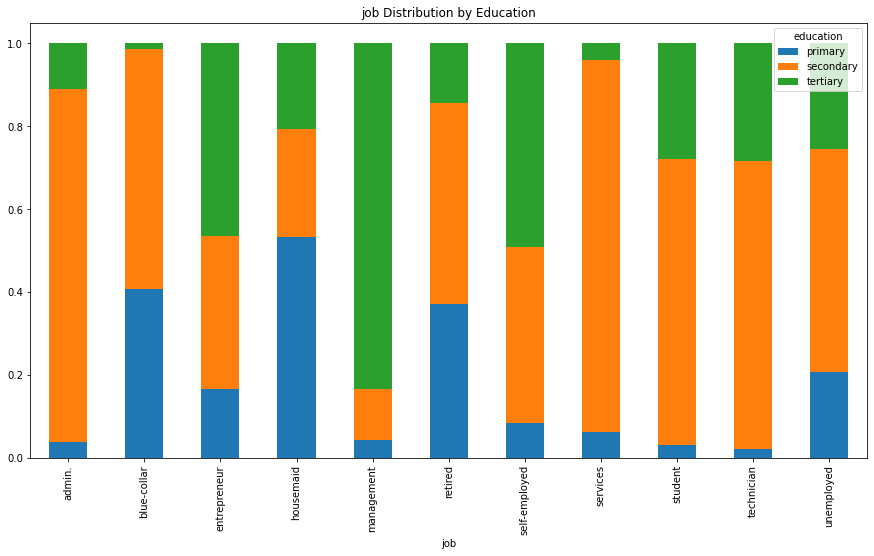

In [31]:
#create pivot of education and job
education_pivot = pd.crosstab(Data.job,Data.education,normalize='index')

#plot the data
education_pivot.plot.bar(stacked=True, figsize=(15,8))

plt.title('job Distribution by Education')
plt.show()

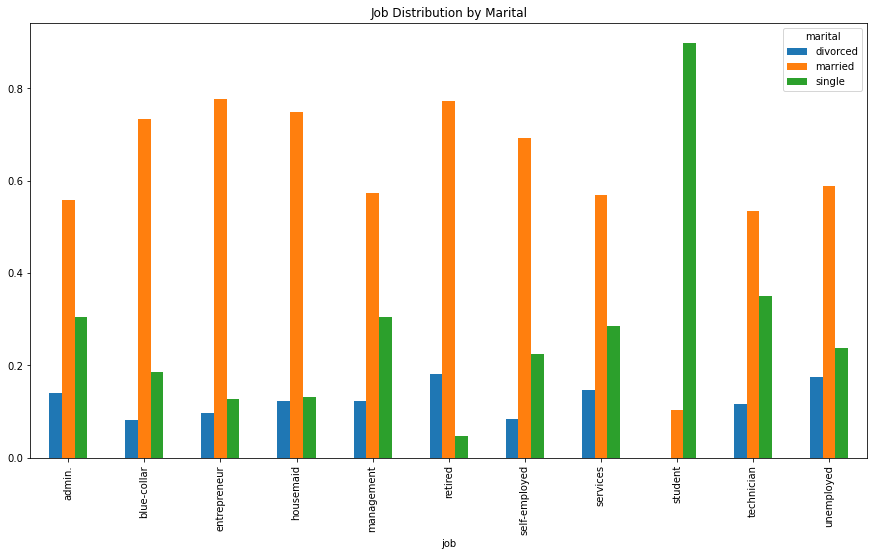

In [32]:
#create pivot of marital and job
marital_pivot = pd.crosstab(Data.job,Data.marital,normalize='index')

#plot the data
marital_pivot.plot.bar( figsize=(15,8))

plt.title('Job Distribution by Marital')
plt.show()

## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

<AxesSubplot:xlabel='age', ylabel='duration'>

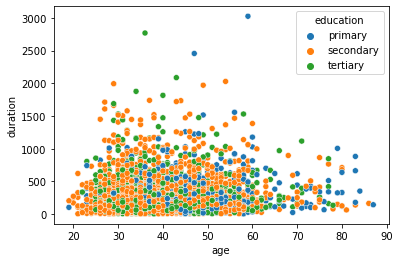

In [33]:
#multivariate analysis cells
# Using hue for categorical column education
sns.scatterplot(data=Data, x="age", y="duration", hue="education")

<AxesSubplot:xlabel='age', ylabel='duration'>

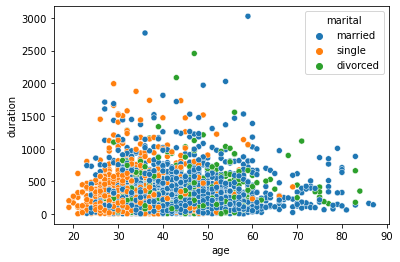

In [34]:
#multivariate analysis cells
# Using hue for categorical column marital
sns.scatterplot(data=Data, x="age", y="duration", hue="marital")

<AxesSubplot:xlabel='age', ylabel='duration'>

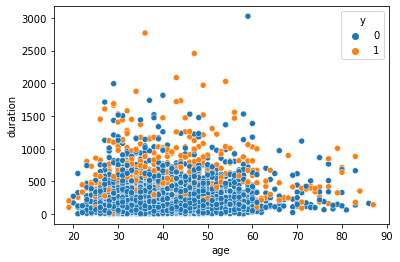

In [35]:
#multivariate analysis cells
# Using hue for continuous column
sns.scatterplot(data=Data, x="age", y="duration", hue="y")

**Feature Engineering**

In [36]:
#Convert categorical data into numerical using One-Hot Encoding
categorical = ["job","marital","education","month"]
categorical

['job', 'marital', 'education', 'month']

In [37]:
categories_dummies = pd.get_dummies(Data[categorical])

categories_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both census_data and categories_dummies as a list of their names
#pop out documentation for pd.concat() to clarify

Data1 = pd.concat([Data, categories_dummies], axis=1)

#check what you have done
print(Data1.shape)
Data1.head()

(4311, 44)


,age,job,marital,education,default,balance,housing,loan,day,month,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
1,30,unemployed,married,primary,0,1787,0,0,19,oct,...,0,0,0,0,0,0,0,0,1,0
2,33,services,married,secondary,0,4789,1,1,11,may,...,0,0,0,0,0,0,1,0,0,0
3,35,management,single,tertiary,0,1350,1,0,16,apr,...,0,0,0,0,0,0,0,0,0,0
4,30,management,married,tertiary,0,1476,1,1,3,jun,...,0,0,0,0,1,0,0,0,0,0
5,59,blue-collar,married,secondary,0,0,1,0,5,may,...,0,0,0,0,0,0,1,0,0,0


In [39]:
#remove the initial categorical columns now that we have encoded them
#use the list called categorical do delete all the initially selected columns at once
#replace pass in the code below

Data2 =Data1.drop(categorical,axis=1)

Data2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
1,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
2,33,0,4789,1,1,11,220,1,339,4,...,0,0,0,0,0,0,1,0,0,0
3,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
4,30,0,1476,1,1,3,199,4,-1,0,...,0,0,0,0,1,0,0,0,0,0
5,59,0,0,1,0,5,226,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,0,-333,1,0,30,329,5,-1,0,...,0,0,0,1,0,0,0,0,0,0
4518,57,1,-3313,1,1,9,153,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4519,57,0,295,0,0,19,151,11,-1,0,...,0,0,0,0,0,0,0,0,0,0
4520,28,0,1137,0,0,6,129,4,211,3,...,0,1,0,0,0,0,0,0,0,0


# Summary of Findings

In this markdown cell, summarize your list of findings.

1. To remove string unkwown using .str.contains
2. To use hue parameter in seaborn
 

# Modelling

In this section, you will train and evaluate your models


## Select Target

In [40]:
y = Data2.y


In [41]:
y.head()

1    0
2    0
3    0
4    0
5    0
Name: y, dtype: int64

## Select Features

In [42]:
features =Data2.drop(["y"],axis=1)
features.shape

(4311, 39)

In [43]:
X = Data2[features.columns]


## Train Test Split

In [44]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import seaborn as sns

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

## Import ML algorithms and initialize them

**Initialize logistic regression**

In [124]:
# confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from sklearn.linear_model import LogisticRegression

In [100]:
LR_model = LogisticRegression(random_state=30)

In [101]:
LR_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=30)

In [102]:
LR_preds = LR_model.predict(X_test)

In [103]:
print(accuracy_score(LR_preds,y_test))

0.8869565217391304


In [104]:
print(classification_report(LR_preds, y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1669
           1       0.15      0.54      0.24        56

    accuracy                           0.89      1725
   macro avg       0.57      0.72      0.59      1725
weighted avg       0.96      0.89      0.92      1725



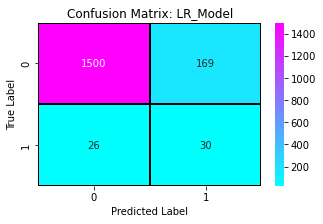

In [113]:
CM = confusion_matrix(LR_preds, y_test)
plt.figure(figsize=(5, 3))
sns.heatmap(CM,
cmap='cool',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: LR_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Initialize DecisionTreeClassifier**

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
DC_model = DecisionTreeClassifier(random_state=30)

In [118]:
DC_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=30)

In [119]:
DC_preds = DC_model.predict(X_test)

In [120]:
print(accuracy_score(DC_preds, y_test))

0.8655072463768116


In [121]:
print(classification_report(DC_preds, y_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1520
           1       0.43      0.42      0.43       205

    accuracy                           0.87      1725
   macro avg       0.68      0.67      0.67      1725
weighted avg       0.86      0.87      0.86      1725



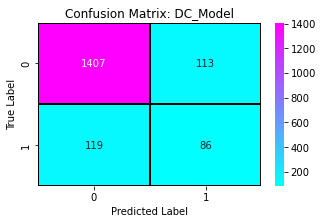

In [125]:
CM = confusion_matrix(DC_preds, y_test)
plt.figure(figsize=(5, 3))
sns.heatmap(CM,
cmap='cool',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: DC_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Initialize KNeighborsClassifier**

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
KN_model = KNeighborsClassifier()

In [60]:
KN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
KN_preds = KN_model.predict(X_test)

In [62]:
print(accuracy_score(KN_preds, y_test))

0.8753623188405797


In [110]:
print(classification_report(KN_preds, y_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1639
           1       0.18      0.41      0.25        86

    accuracy                           0.88      1725
   macro avg       0.57      0.65      0.59      1725
weighted avg       0.93      0.88      0.90      1725



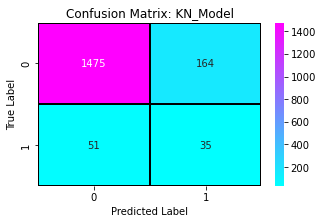

In [126]:
CM = confusion_matrix(KN_preds, y_test)
plt.figure(figsize=(5, 3))
sns.heatmap(CM,
cmap='cool',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: KN_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Initialize RandomForestClassifier**

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
RF_model =  RandomForestClassifier(random_state=30)

In [66]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [67]:
RF_preds = RF_model.predict(X_test)

In [68]:
print(accuracy_score(RF_preds, y_test))

0.888695652173913


In [69]:
print(classification_report(RF_preds, y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1652
           1       0.20      0.55      0.29        73

    accuracy                           0.89      1725
   macro avg       0.59      0.73      0.62      1725
weighted avg       0.95      0.89      0.91      1725



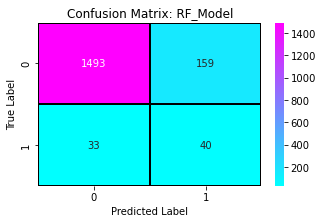

In [127]:
CM = confusion_matrix(RF_preds, y_test)
plt.figure(figsize=(5, 3))
sns.heatmap(CM,
cmap='cool',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: RF_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Train and Test the models

In [74]:
models = [LR_model,KN_model,DC_model,RF_model]

In [75]:
models

[LogisticRegression(random_state=30),
 KNeighborsClassifier(),
 DecisionTreeClassifier(random_state=30),
 RandomForestClassifier(random_state=30)]

In [79]:
#create function to train a model and evaluate accuracy
def trainer(models,X_train,y_train,X_test,y_test):
    #fit your model
    models.fit(X_train,y_train)
    #predict on the fitted model
    prediction = models.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(models.__class__.__name__,accuracy_score(prediction,y_test)))

In [81]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)
    

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For LogisticRegression, Accuracy score is 0.8869565217391304 


For KNeighborsClassifier, Accuracy score is 0.8753623188405797 


For DecisionTreeClassifier, Accuracy score is 0.8655072463768116 


For RandomForestClassifier, Accuracy score is 0.888695652173913 



## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

**For RandomForest** 

20% of the predicted positive 199 are actual positive. i.e 80% false positives. 
  40 client of 199 predicted to subscribe is going to subscribe while 159 client may not.
    
55% of the actual positve 73 are true positive. i.e 45% false negatives.
  40 clients of 73 actual clients is going to subscribe.

With 89% accuracy 

**For LogisticRegression**

15% of the predicted positive 199 are actual positive. i.e 85% false positives. 
  30 client of 199 predicted to subscribe is going to subscribe while 166 client may not.
    
54% of the actual positve 56 are true positive. i.e 46% false negatives.
  30 clients of 56 actual clients is going to subscribe.

With 89% accuracy 

**For KNeighbors**

18% of the predicted positive 199 are actual positive. i.e 82% false positives. 
  35 client of 199 predicted to subscribe is going to subscribe while 164 client may not.
    
25% of the actual positve 86 are true positive. i.e 75% false negatives.
  35 clients of 86 actual clients is going to subscribe.

With 88% accuracy 

**For DecisionTree**

43% of the predicted positive 199 are actual positive. i.e 57% false positives. 
  86 client of 199 predicted to subscribe is going to subscribe while 110 client may not.
    
42% of the actual positve 205 are true positive. i.e 58% false negatives.
  86 clients of 205 actual clients is going to subscribe.

With 87% accuracy 

## Summary

What model should be deployed to production?
Any other comments?

**The best model to deploy for this production is RandomForest. Because it has highest percentage of recall with accuracy iof 89%.**